# バックテスト用

input:期間、所持金、使用するルール<br>
output:期間中の所持金の増減具合、図とシャープレシオの値<br>

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from trading_rule.simple_predict_base import trade
from tqdm.notebook import tqdm

In [143]:
#パラメータ
start = '2016-01-01'
end = '2017-12-31'
posses = {'JPY':10000,'USD':0}

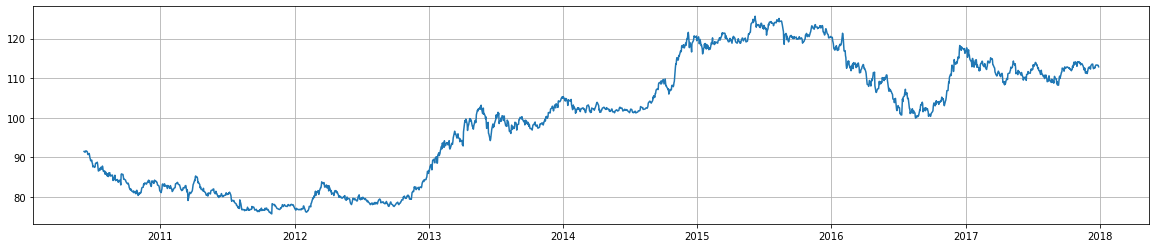

In [144]:
jpy_usd = pd.read_csv('../temp_data/jpy_usd.csv')
jpy_usd.index = pd.to_datetime(jpy_usd['Date'])
del jpy_usd['Date']
jpy_usd = jpy_usd[:end]
plt.figure(figsize=(20,4))
plt.plot(jpy_usd['Close'])
plt.grid()
plt.show()

In [145]:
term_df = jpy_usd[start:end]

In [146]:
import warnings
warnings.simplefilter('ignore')

pos_trans = []
flag = 0
hit_count = 0
trade_count = 0

for i in tqdm(range(len(term_df))):
    current_day = str(term_df.index[i])[:10]
    if flag == 'after_sell':
        posses['JPY'] += (posses['USD']*0.5*jpy_usd.loc[current_day,'Close'])
        posses['USD'] = posses['USD']*0.5
        #実際昨日より値が上がったらあたり
        if jpy_usd.loc[:current_day,'Close'][-2] < jpy_usd.loc[:current_day,'Close'][-1]:
            print('hit')
            hit_count += 1
        trade_count += 1
            
    elif flag == 'after_buy':
        posses['USD'] += (posses['JPY']*0.5/jpy_usd.loc[current_day,'Close'])
        posses['JPY'] = posses['JPY']*0.5
        #実際昨日より値が下がったらあたり
        if jpy_usd.loc[:current_day,'Close'][-2] > jpy_usd.loc[:current_day,'Close'][-1]:
            print('hit')
            hit_count += 1
        trade_count += 1
    
    try:
        print(hit_count/trade_count*100)
    except:
        pass
#     print(current_day,posses,flag)
    posses,flag = trade(current_day=str(term_df.index[i])[:10],posses=posses,df=jpy_usd)
#     print(posses,flag)
    rec = posses.copy()
    rec['current_day'] = str(term_df.index[i])[:10]
    pos_trans.append(rec)
    
pos_trans = pd.DataFrame(pos_trans)

  0%|          | 0/519 [00:00<?, ?it/s]

0.0
hit
50.0
33.33333333333333
25.0
20.0
16.666666666666664
hit
28.57142857142857
hit
37.5
33.33333333333333
hit
40.0
36.36363636363637
36.36363636363637
hit
41.66666666666667
38.46153846153847
hit
42.857142857142854
42.857142857142854
40.0
37.5
hit
41.17647058823529
41.17647058823529
38.88888888888889
hit
42.10526315789473
42.10526315789473
42.10526315789473
42.10526315789473
hit
45.0
42.857142857142854
40.909090909090914
39.130434782608695
39.130434782608695
39.130434782608695
hit
41.66666666666667
40.0
hit
42.30769230769231
40.74074074074074
39.285714285714285
hit
41.37931034482759
41.37931034482759
hit
43.333333333333336
hit
45.16129032258064
hit
46.875
45.45454545454545
hit
47.05882352941176
47.05882352941176
hit
48.57142857142857
hit
50.0
48.64864864864865
48.64864864864865
48.64864864864865
48.64864864864865
hit
50.0
hit
51.28205128205128
50.0
48.78048780487805
48.78048780487805
48.78048780487805
48.78048780487805
48.78048780487805
hit
50.0
50.0
hit
51.162790697674424
51.1627906

hit
55.02392344497608
hit
55.23809523809524
hit
55.45023696682464
55.188679245283026
54.929577464788736
54.67289719626168
54.418604651162795
54.166666666666664
hit
54.377880184331794
hit
54.58715596330275
54.58715596330275
54.58715596330275
54.58715596330275
54.58715596330275
54.337899543378995
hit
54.54545454545454
54.54545454545454
54.29864253393665
54.29864253393665
54.29864253393665
54.29864253393665
54.29864253393665
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
54.054054054054056
53.81165919282511
53.81165919282511
53.81165919282511
53.57142857142857
53.57142857142857
53.57142857142857
53.333333333333336
53.09734513274337
53.09734513274337
hit
53.30396475770925
53.07017543859649
53.07017543859649
52.83842794

In [147]:
hit_count

131

In [148]:
trade_count

245

In [149]:
pos_trans.index = pd.to_datetime(pos_trans['current_day'])
del pos_trans['current_day']

In [150]:
df = pd.concat([pos_trans,jpy_usd],axis=1)

In [151]:
df['JPY_POS'] = df['USD']*df['Close']+df['JPY']

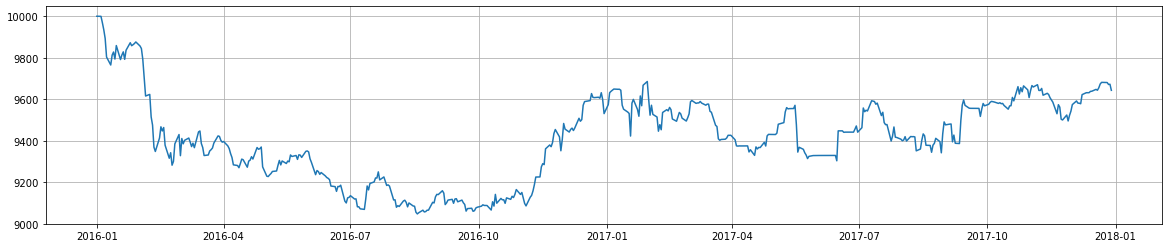

In [152]:
plt.figure(figsize=(20,4))
plt.plot(df['JPY_POS'])
plt.grid()
plt.show()

In [153]:
df = df.dropna()

In [154]:
df['base_pos'] = df['Close']/df.iloc[0,5]*10000

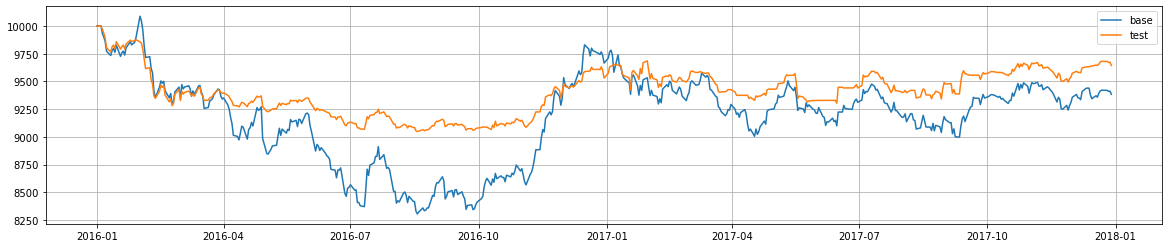

In [155]:
plt.figure(figsize=(20,4))
plt.plot(df['base_pos'])
plt.plot(df['JPY_POS'])
plt.legend(['base','test'])
plt.grid()
plt.show()

In [156]:
risk = df['JPY_POS'].std()/10000

In [157]:
ret = (df['JPY_POS'].mean()-10000)/10000

In [158]:
ret/risk

-2.9516754943088084